Three steps to find the dominant colors in an image:  

- Extract RGB values into three lists  
- Perform k-means clustering on scaled RGB values  
- Display the colors of cluster centers  


All images consist of pixels, each pixel has three values: Red, Green and Blue.   
Pixel color is a combination of these RGB values.   
A RGB color value is specified with: rgb(red, green, blue).   
Each parameter (red, green, and blue) defines the intensity of the color as an integer between 0 and 255.   
eg., rgb(0, 0, 255) is rendered as blue, because the blue parameter is set to its highest value (255) and the others are set to 0.

Perform k-means on standardized RGB values to find cluster centers

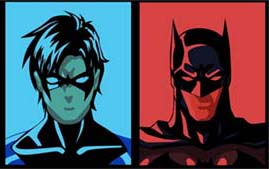

In [1]:
from IPython.display import Image
Image('...\batman.jpg')

Above is the image I will be trying to find the dominant colours of

In [2]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('...\batman.jpg')
print(batman_image.shape)

r=[]
g=[]
b=[]
# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [3]:
import pandas as pd
from scipy.cluster.vq import whiten
scaled_r = whiten(r)
scaled_g=whiten(g)
scaled_b=whiten(b)
batman_df = pd.DataFrame({'scaled_red': scaled_r, 'scaled_blue': scaled_b, 'scaled_green':scaled_g, 'red': r, 'blue': b, 'green':g})
batman_df

,scaled_red,scaled_blue,scaled_green,red,blue,green
0,0.450157,0.279912,0.370103,36,25,28
1,0.487671,0.212733,0.277577,39,19,21
2,0.650227,0.235126,0.264359,52,21,20
3,0.762767,0.313502,0.356885,61,28,27
4,0.462662,0.201537,0.198269,37,18,15
...,...,...,...,...,...,...
45456,0.412644,0.302305,0.317231,33,27,24
45457,0.387636,0.279912,0.290795,31,25,22
45458,0.425149,0.313502,0.330449,34,28,25
45459,0.225079,0.167947,0.185051,18,15,14


In [4]:
# Construct an elbow plot with the data frame. How many dominant colors are present?
from scipy.cluster.vq import kmeans
import seaborn as sns
import matplotlib.pyplot as plt
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.show()
## three distinct colors present in the image, which is supported by the elbow plot

<Figure size 640x480 with 1 Axes>

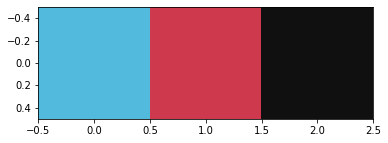

In [5]:
#display dominant colours

# To display the dominant colors, convert the colors of the cluster centers to their raw values and 
# then converted them to the range of 0-1, using the following formula: 
# converted_pixel = standardized_pixel * pixel_std / 255

cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
    
# Display colors of cluster centers
plt.imshow([colors])
plt.show()